In [85]:
print(9)

9


In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import sklearn as sk


##Loading Data


In [87]:
data = pd.read_excel('/content/default_of_credit_card_clients[1].xls', skiprows=1)

In [88]:
data

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  \
0          1      20000    2          2         1   24      2      2     -1   
1          2     120000    2          2         2   26     -1      2      0   
2          3      90000    2          2         2   34      0      0      0   
3          4      50000    2          2         1   37      0      0      0   
4          5      50000    1          2         1   57     -1      0     -1   
...      ...        ...  ...        ...       ...  ...    ...    ...    ...   
29995  29996     220000    1          3         1   39      0      0      0   
29996  29997     150000    1          3         2   43     -1     -1     -1   
29997  29998      30000    1          2         2   37      4      3      2   
29998  29999      80000    1          3         1   41      1     -1      0   
29999  30000      50000    1          2         1   46      0      0      0   

       PAY_4  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  \
0         -1  ...          0          0          0         0       689   
1          0  ...       3272       3455       3261         0      1000   
2          0  ...      14331      14948      15549      1518      1500   
3          0  ...      28314      28959      29547      2000      2019   
4          0  ...      20940      19146      19131      2000     36681   
...      ...  ...        ...        ...        ...       ...       ...   
29995      0  ...      88004      31237      15980      8500     20000   
29996     -1  ...       8979       5190          0      1837      3526   
29997     -1  ...      20878      20582      19357         0         0   
29998      0  ...      52774      11855      48944     85900      3409   
29999      0  ...      36535      32428      15313      2078      1800   

       PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  default payment next month  
0             0         0         0         0                           1  
1          1000      1000         0      2000                           1  
2          1000      1000      1000      5000                           0  
3          1200      1100      1069      1000                           0  
4         10000      9000       689       679                           0  
...         ...       ...       ...       ...                         ...  
29995      5003      3047      5000      1000                           0  
29996      8998       129         0         0                           0  
29997     22000      4200      2000      3100                           1  
29998      1178      1926     52964      1804                           1  
29999      1430      1000      1000      1000                           1  

[30000 rows x 25 columns]

In [89]:
data.describe()

ID       LIMIT_BAL           SEX     EDUCATION      MARRIAGE  \
count  30000.000000    30000.000000  30000.000000  30000.000000  30000.000000   
mean   15000.500000   167484.322667      1.603733      1.853133      1.551867   
std     8660.398374   129747.661567      0.489129      0.790349      0.521970   
min        1.000000    10000.000000      1.000000      0.000000      0.000000   
25%     7500.750000    50000.000000      1.000000      1.000000      1.000000   
50%    15000.500000   140000.000000      2.000000      2.000000      2.000000   
75%    22500.250000   240000.000000      2.000000      2.000000      2.000000   
max    30000.000000  1000000.000000      2.000000      6.000000      3.000000   

                AGE         PAY_0         PAY_2         PAY_3         PAY_4  \
count  30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean      35.485500     -0.016700     -0.133767     -0.166200     -0.220667   
std        9.217904      1.123802      1.197186      1.196868      1.169139   
min       21.000000     -2.000000     -2.000000     -2.000000     -2.000000   
25%       28.000000     -1.000000     -1.000000     -1.000000     -1.000000   
50%       34.000000      0.000000      0.000000      0.000000      0.000000   
75%       41.000000      0.000000      0.000000      0.000000      0.000000   
max       79.000000      8.000000      8.000000      8.000000      8.000000   

       ...      BILL_AMT4      BILL_AMT5      BILL_AMT6       PAY_AMT1  \
count  ...   30000.000000   30000.000000   30000.000000   30000.000000   
mean   ...   43262.948967   40311.400967   38871.760400    5663.580500   
std    ...   64332.856134   60797.155770   59554.107537   16563.280354   
min    ... -170000.000000  -81334.000000 -339603.000000       0.000000   
25%    ...    2326.750000    1763.000000    1256.000000    1000.000000   
50%    ...   19052.000000   18104.500000   17071.000000    2100.000000   
75%    ...   54506.000000   50190.500000   49198.250000    5006.000000   
max    ...  891586.000000  927171.000000  961664.000000  873552.000000   

           PAY_AMT2      PAY_AMT3       PAY_AMT4       PAY_AMT5  \
count  3.000000e+04   30000.00000   30000.000000   30000.000000   
mean   5.921163e+03    5225.68150    4826.076867    4799.387633   
std    2.304087e+04   17606.96147   15666.159744   15278.305679   
min    0.000000e+00       0.00000       0.000000       0.000000   
25%    8.330000e+02     390.00000     296.000000     252.500000   
50%    2.009000e+03    1800.00000    1500.000000    1500.000000   
75%    5.000000e+03    4505.00000    4013.250000    4031.500000   
max    1.684259e+06  896040.00000  621000.000000  426529.000000   

            PAY_AMT6  default payment next month  
count   30000.000000                30000.000000  
mean     5215.502567                    0.221200  
std     17777.465775                    0.415062  
min         0.000000                    0.000000  
25%       117.750000                    0.000000  
50%      1500.000000                    0.000000  
75%      4000.000000                    0.000000  
max    528666.000000                    1.000000  

[8 rows x 25 columns]

In [90]:
data.dtypes

ID                            int64
LIMIT_BAL                     int64
SEX                           int64
EDUCATION                     int64
MARRIAGE                      int64
AGE                           int64
PAY_0                         int64
PAY_2                         int64
PAY_3                         int64
PAY_4                         int64
PAY_5                         int64
PAY_6                         int64
BILL_AMT1                     int64
BILL_AMT2                     int64
BILL_AMT3                     int64
BILL_AMT4                     int64
BILL_AMT5                     int64
BILL_AMT6                     int64
PAY_AMT1                      int64
PAY_AMT2                      int64
PAY_AMT3                      int64
PAY_AMT4                      int64
PAY_AMT5                      int64
PAY_AMT6                      int64
default payment next month    int64
dtype: object

In [91]:
data.shape

(30000, 25)

##Exploration and visualizatoin

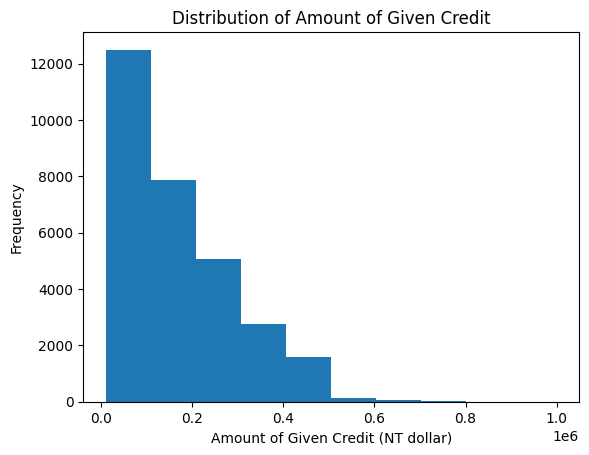

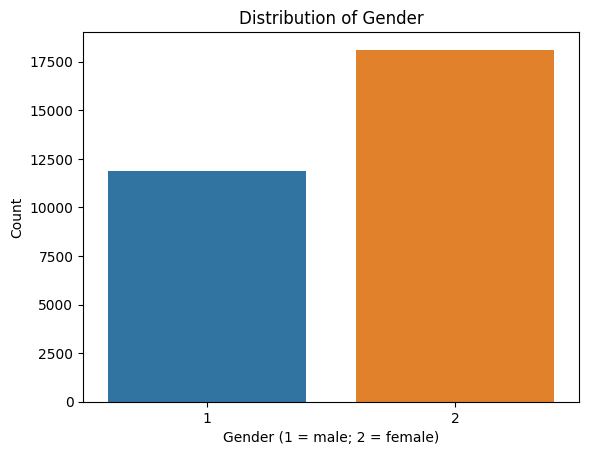

In [92]:
import seaborn as sns
# Univariate analysis
plt.hist(data['LIMIT_BAL'])
plt.title('Distribution of Amount of Given Credit')
plt.xlabel('Amount of Given Credit (NT dollar)')
plt.ylabel('Frequency')
plt.show()

sns.countplot(x='SEX', data=data)
plt.title('Distribution of Gender')
plt.xlabel('Gender (1 = male; 2 = female)')
plt.ylabel('Count')
plt.show()

plt.hist(data['AGE'])
plt.title('Distribution of Age Group')
plt.xlabel('Ages')
plt.ylabel('Freq')
plt.show()

##Correlations between features

In [93]:
correlations = data.corr()['default payment next month'].sort_values(ascending=False)

# Display the correlation values
print(correlations)

default payment next month    1.000000
PAY_0                         0.324794
PAY_2                         0.263551
PAY_3                         0.235253
PAY_4                         0.216614
PAY_5                         0.204149
PAY_6                         0.186866
EDUCATION                     0.028006
AGE                           0.013890
BILL_AMT6                    -0.005372
BILL_AMT5                    -0.006760
BILL_AMT4                    -0.010156
ID                           -0.013952
BILL_AMT3                    -0.014076
BILL_AMT2                    -0.014193
BILL_AMT1                    -0.019644
MARRIAGE                     -0.024339
SEX                          -0.039961
PAY_AMT6                     -0.053183
PAY_AMT5                     -0.055124
PAY_AMT3                     -0.056250
PAY_AMT4                     -0.056827
PAY_AMT2                     -0.058579
PAY_AMT1                     -0.072929
LIMIT_BAL                    -0.153520
Name: default payment nex

In [94]:
plt.figure(figsize=(14, 10))
sns.heatmap(data.corr(), annot=True, fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [95]:
data.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [108]:
X.min()

PC1    -4.428168
PC2   -11.771843
PC3    -4.745392
PC4    -1.948900
PC5   -21.620298
PC6   -19.346207
PC7   -18.144183
dtype: float64

##Dimention Reduction with PCA

In [109]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

numerical_columns = ['AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
numerical_data = data[numerical_columns]

# Standardize the numerical features
standardized_data = StandardScaler().fit_transform(numerical_data)

# Apply PCA
pca = PCA(n_components=2)  # Choose the number of components or explained variance ratio
reduced_data = pca.fit_transform(standardized_data)

# Display the transformed data
print(pd.DataFrame(reduced_data, columns=[f'PC{i}' for i in range(1, reduced_data.shape[1] + 1)]))


            PC1       PC2
0     -1.787713 -0.689307
1     -0.672409 -2.112713
2     -0.768354 -0.941432
3     -0.112951 -0.615685
4     -0.827431  0.179395
...         ...       ...
29995  2.423100  0.849016
29996 -1.825943  0.122952
29997  0.475331 -3.037751
29998  0.609706  1.135439
29999 -0.109850 -0.556729

[30000 rows x 2 columns]


##Building and Training ANN Model

In [168]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
#pca_data = pd.concat([pd.DataFrame(reduced_data, columns=['PC1', 'PC2']), data[['LIMIT_BAL', 'default payment next month']]], axis=1)


X = data.drop('default payment next month', axis=1)
y = data['default payment next month']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the ANN model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=128, activation='relu', input_dim=X_train.shape[1]),
    tf.keras.layers.Dense(units=3, activation='relu'),
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])


In [151]:

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train_scaled, y_train, epochs=5, batch_size=32, validation_split=0.2, verbose = 0)

loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')


188/188 [==============================] - 1s 3ms/step - loss: 0.4601 - accuracy: 0.8105
Test Loss: 0.4600541889667511, Test Accuracy: 0.8105053305625916


In [ ]:
mae = tf.metrics.mean_squared_error(y_test,y_pred)
print(int(mae))

In [ ]:
y_test,y_pred

In [154]:
X_test

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  \
2308    2309      30000    1          2         2   25      0      0      0   
22404  22405     150000    2          1         2   26      0      0      0   
23397  23398      70000    2          3         1   32      0      0      0   
25058  25059     130000    1          3         2   49      0      0      0   
2664    2665      50000    2          2         2   36      0      0      0   
...      ...        ...  ...        ...       ...  ...    ...    ...    ...   
2210    2211     360000    2          1         2   27      1     -2     -1   
14144  14145     500000    2          1         2   28      2      0      0   
23108  23109      60000    2          1         1   28      0      0      0   
25703  25704      20000    2          1         2   29      1     -1     -1   
29171  29172     510000    2          3         1   61      0      0      0   

       PAY_4  ...  BILL_AMT3  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  \
2308       0  ...      11581      12580      13716      14828      1500   
22404      0  ...     116684     101581      77741      77264      4486   
23397      0  ...      68530      69753      70111      70212      2431   
25058      0  ...      16172      16898      11236       6944      1610   
2664       0  ...      42361      19574      20295      19439      2000   
...      ...  ...        ...        ...        ...        ...       ...   
2210      -1  ...        830          0       1271        179         0   
14144      2  ...     111690      78070      78376      80912      6000   
23108      0  ...      48696      50385      52045      52661      2100   
25703     -1  ...       3967       1364        600          0      2494   
29171      2  ...     192903     181801     178179     223100      8500   

       PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  
2308       2000      1500      1500      1500      2000  
22404      4235      3161      2647      2669      2669  
23397      3112      3000      2438      2500      2554  
25058      1808      7014        27      7011      4408  
2664       1500      1000      1800         0      1000  
...         ...       ...       ...       ...       ...  
2210        830         0      1271       179      1970  
14144     13151         0      3000      5000     10000  
23108      2500      2500      2500      1600      1500  
25703      3967      1370       600         0         0  
29171     17000         0      6508     50000      7000  

[6000 rows x 24 columns]

##Accuracy and F1 score

In [167]:

y_pred = (model.predict(X_test_scaled) > 0.5).astype(int)


# Display evaluation metrics
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


188/188 [==============================] - 0s 2ms/step
[[4371  316]
 [ 824  489]]
              precision    recall  f1-score   support

           0       0.84      0.93      0.88      4687
           1       0.61      0.37      0.46      1313

    accuracy                           0.81      6000
   macro avg       0.72      0.65      0.67      6000
weighted avg       0.79      0.81      0.79      6000



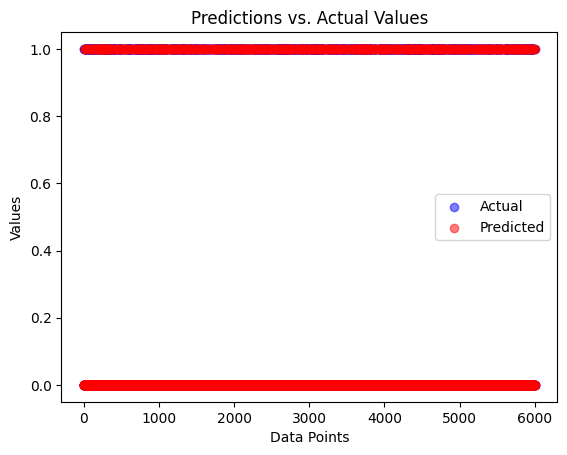

In [169]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming y_test and y_pred are NumPy arrays
#y_test = np.array(y_test)
#y_pred = np.squeeze(y_pred)  # Ensure y_pred is a 1D array

# Plot predictions vs. actual values with different colors

plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual', alpha=0.5)
plt.scatter(range(len(y_test)), y_pred, color='red', label='Predicted', alpha=0.5)
plt.title('Predictions vs. Actual Values')
plt.xlabel('Data Points')
plt.ylabel('Values')
plt.legend()
plt.show()


In [159]:
np.array(y_test)

array([0, 0, 0, ..., 0, 0, 0])